In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
#from scipy.constants import epsilon_0

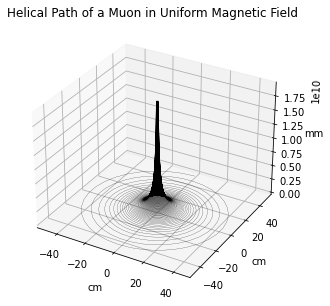

In [6]:
#rename DONE
#conversion function DONE
#update beta,gamma DONE


#total relativistic energy
eTotalEnergy = 105000 #keV

#total rest energy
eRestMass = 511 #keV

#gamma/Lorentz factor
gamma = eTotalEnergy/eRestMass #unitless

#beta (v/c) constant
beta_0 = (1-(1/gamma)**2)**(1/2) #unitless


#initial velocity of particle
#velocity = beta_0 ##1

#randomly generated theta
theta = np.pi/4 #unitless

#perpendicular and parallel components of velocity
#vPerp = beta_0*np.sin(theta) #unitless
#vParallel = beta_0*np.cos(theta) #unitless
betaPerp = beta_0*np.sin(theta) #unitless
betaParallel = beta_0*np.cos(theta) #unitless

#angular velocity, initial magnetic field, B, radius of helix
    # c,q =1 in natural units
eMass = eTotalEnergy/gamma #keV
magField = 2.97*10**-5 #keV^2
omega = magField/(gamma * eMass) #keV
helixRadius = betaPerp/omega #1/keV

def keVtocm(lst):
    newLst = [x * (1.9732705*10**-8) for x in lst]
    return newLst

def keVtomm(lst):
    newLst = [x * (1.9732705*10**-7) for x in lst]
    return newLst

def keVtos(lst):
    newLst = [x * (6.582122*10**-19) for x in lst]
    return newLst

def keVtoHz(lst):
    newLst = [x * ((1.5192669*10**18) * 1*10**-9) for x in lst]
    return newLst

def keVtoJoules(lst):
    newLst = [x * (0.2434135 * 1000000000000) for x in lst]
    return newLst
    
    
    
def helicalPath():
    x_coor = []
    y_coor = []
    z_coor = []
    timeLst = []
    radiationLst = []
    omegaLst = []
    powerLst = []
    gammaLst = []
    x,y,z = 0, 0, 0
    time = 0 
    helixRadiusUpdate = helixRadius
    omegaUpdate = omega
    #eMassUpdate = eMass
    initialEnergy = eTotalEnergy
    betaUpdate = beta_0
    betaLst = [beta_0]
    betaPerpUpdate = betaPerp
    betaParallelUpdate = betaParallel
    results = []
    omega_c = magField/eRestMass #keV
    while (initialEnergy > 0):
        timeLst.append(time)
        dt = 1.0*10**13 #1.1e15 #1/keV
        power = ((2*omega_c**2)/3)*(betaPerpUpdate**2/(1-betaUpdate**2))
        emitted_radiation = ((2*omega_c**2)/3)*(betaPerpUpdate**2/(1-betaUpdate**2)) * dt
        radiationLst.append(emitted_radiation)
        powerLst.append(power)
        delta_x = helixRadiusUpdate * np.sin(omega_c*time)
        delta_y = helixRadiusUpdate * np.cos(omega_c*time)
        delta_z = betaParallelUpdate*time
        time += dt
        x_coor.append(x+delta_x)
        y_coor.append(y+delta_y)
        z_coor.append(z+delta_z)
        initialEnergy = initialEnergy - emitted_radiation
        gammaUpdate = initialEnergy/eRestMass
        gammaLst.append(gammaUpdate)
        betaUpdate = (1-(1/(gammaUpdate))**2)**(1/2)
        betaLst.append(betaUpdate)
        betaPerpUpdate = betaUpdate * np.sin(theta)
        betaParallelUpdate = betaUpdate * np.cos(theta)
        #eMassUpdate = initialEnergy/gammaUpdate
        omegaUpdate = magField/(gammaUpdate * eRestMass)
        omegaLst.append(omegaUpdate)
        helixRadiusUpdate = betaPerpUpdate/omegaUpdate

        if emitted_radiation < .10:
            break
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')
    #ax.scatter(keVtocm(x_coor),keVtocm(y_coor),keVtocm(z_coor), s = .1)
    ax.plot(keVtocm(x_coor),keVtocm(y_coor),keVtomm(z_coor), color = 'black',linewidth = 0.2)
    ax.set_zlabel('mm')
    plt.title('Helical Path of a Muon in Uniform Magnetic Field')
    plt.xlabel('cm')
    plt.ylabel('cm')
    plt.show()
    
    
    
    #plt.plot(keVtos(timeLst[1:2000]), radiationLst[1:2000])
    #plt.xlabel('time [s]')
    #plt.ylabel('emitted radiation [keV]')
    
    
    #count = 0
    #for i in range(len(powerLst)):
     #   if (powerLst[i] * (0.2434135 * 1000000000000)) > 0.0001:
      #      count += 1
    #print(count)
    
    
    #plt.plot(keVtos(timeLst), keVtoJoules(powerLst))
    #plt.ylabel('power [pW]')
    #plt.xlabel('time [s]')
    #plt.title('Power vs. Time')
    
    #plt.plot(keVtoHz(omegaLst[0:1301]), keVtoJoules(powerLst[0:1301]))
    #plt.ylabel('power [pW]')
    #plt.xlabel('omega [GHz]')
    #plt.title('Power vs. Omega')
    
    #plt.plot(keVtos(timeLst[0:2000]), keVtoHz(omegaLst[0:2000]))
    #plt.ylabel('omega [GHz]')
    #plt.xlabel('time [s]')
    #plt.title('Omega vs. Time')
  

    plt.show()

helicalPath()

    
    
    
    
    

In [4]:
def g():
    initial_energy = 105000
    eMass = 511
    gamma1 = initial_energy/eMass
    beta = (1-(1/gamma1)**2)**(1/2)
    magneticField = 2.97e-5
    radiation = 0
    time = 0
    omega_c = magneticField/eMass
    thetas = np.arange(0, np.pi*4, 0.01)
    results = []
    for theta in thetas:
        beta_perp = beta * np.sin(theta)
        beta_parallel = beta * np.cos(theta)
        
        g_parallel = 1 - (beta_parallel * np.cos(theta))
        f_num = 4*(g_parallel**2)*( ((1 + beta_parallel**2)*(1+(np.cos(theta))**2)) 
                                    - 4*beta_parallel*np.cos(theta)) - (1 - beta_parallel**2 + 3*(beta_perp**2))*(beta_perp**2)*(np.sin(theta))**4
        f_denom = 4*(g_parallel**2 - (beta_perp)**2*(np.sin(theta))**2)**(7/2)
        f = f_num/f_denom
        
        solid_angle = ((omega_c**2)/(8*np.pi))*(1-beta**2)*(beta_perp**2)*f
        power = ((2*omega_c**2)/3)*(beta_perp**2/(1-beta**2))
        dt = 1.0e13
        radiation += power * dt
        time += dt
        initial_energy = initial_energy - radiation
        gamma1 = initial_energy/eMass
        beta = (1-(1/gamma1)**2)**(1/2)
        results.append(solid_angle/(power/4*np.pi))
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(thetas, results)
    m = np.max(results) * 1.5
    ax.set_rmax(m)
    ax.set_rticks([m/4, m/2, m*0.75, m])  # Less radial ticks
    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    ax.grid(True)
    plt.show()
    
g()
        
        
        
        

/tmp/ipykernel_49/2793740735.py:30: RuntimeWarning: invalid value encountered in double_scalars
  results.append(solid_angle/(power/4*np.pi))
/tmp/ipykernel_49/2793740735.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  f = f_num/f_denom
/tmp/ipykernel_49/2793740735.py:22: RuntimeWarning: invalid value encountered in double_scalars
  solid_angle = ((omega_c**2)/(8*np.pi))*(1-beta**2)*(beta_perp**2)*f
/tmp/ipykernel_49/2793740735.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  power = ((2*omega_c**2)/3)*(beta_perp**2/(1-beta**2))
/tmp/ipykernel_49/2793740735.py:20: RuntimeWarning: invalid value encountered in double_scalars
  f = f_num/f_denom
/tmp/ipykernel_49/2793740735.py:19: RuntimeWarning: invalid value encountered in double_scalars
  f_denom = 4*(g_parallel**2 - (beta_perp)**2*(np.sin(theta))**2)**(7/2)


ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>